# Reading the data

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import poisson

# Set random seed for reproducibility
np.random.seed(42)

# Number of records
n = 1500000

# Generate features
data = {
    'CustomerID': [f'CUST{i:07d}' for i in range(1, n + 1)],
    'Age': np.random.normal(40, 12, n).clip(18, 80).astype(int),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], n, p=[0.48, 0.48, 0.04]),
    'Tenure': np.random.exponential(20, n).clip(0, 60).astype(int),
    'MonthlyCharges': np.random.uniform(20, 150, n).round(2),
    'ContractType': np.random.choice(['Month-to-month', 'One-year', 'Two-year'], n, p=[0.5, 0.3, 0.2]),
    'PaymentMethod': np.random.choice(['Credit card', 'Bank transfer', 'Electronic check', 'Mailed check'], n, p=[0.3, 0.3, 0.3, 0.1]),
    'TechSupport': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7]),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'None'], n, p=[0.3, 0.4, 0.3]),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], n, p=[0.6, 0.4]),
    'NumComplaints': poisson.rvs(1, size=n).clip(0, 10),
    'LastInteractionDays': np.random.uniform(0, 30, n).round(0).astype(int)
}

# Calculate TotalCharges
data['TotalCharges'] = (data['Tenure'] * data['MonthlyCharges'] * np.random.uniform(0.9, 1.1, n)).round(2)

# Generate Churn (logistic function to model probability)
def churn_probability(row):
    score = (
        -0.05 * row['Tenure'] +
        0.02 * row['MonthlyCharges'] +
        0.5 * row['NumComplaints'] +
        0.03 * row['LastInteractionDays'] +
        (1.5 if row['ContractType'] == 'Month-to-month' else -0.5 if row['ContractType'] == 'Two-year' else 0) +
        (0.7 if row['TechSupport'] == 'No' else 0) +
        (0.5 if row['InternetService'] == 'Fiber optic' else 0)
    )
    prob = 1 / (1 + np.exp(-score))  # Logistic function
    return prob

# Apply churn probability and assign churn
probs = pd.DataFrame(data).apply(churn_probability, axis=1)
data['Churn'] = np.random.binomial(1, probs)

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('churn_data.csv', index=False)

# Print summary
print(f"Dataset shape: {df.shape}")
print(f"Churn rate: {df['Churn'].mean():.2%}")
print(df.head())

Dataset shape: (1500000, 14)
Churn rate: 90.12%
    CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0  CUST0000001   45  Female      36           29.67  Month-to-month   
1  CUST0000002   38    Male       2          125.98  Month-to-month   
2  CUST0000003   47  Female       7          136.19        One-year   
3  CUST0000004   58    Male      50          133.64        One-year   
4  CUST0000005   37    Male      20          148.12        Two-year   

      PaymentMethod TechSupport InternetService PaperlessBilling  \
0     Bank transfer         Yes             DSL              Yes   
1  Electronic check          No     Fiber optic              Yes   
2     Bank transfer          No     Fiber optic              Yes   
3       Credit card          No     Fiber optic               No   
4  Electronic check          No            None              Yes   

   NumComplaints  LastInteractionDays  TotalCharges  Churn  
0              1                   27       1174.18    

In [ ]:
# Load dataset
df = pd.read_csv('churn_data.csv')

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for inconsistencies
print("Negative Tenure:", (df['Tenure'] < 0).sum())
print("Negative MonthlyCharges:", (df['MonthlyCharges'] < 0).sum())
print("Negative TotalCharges:", (df['TotalCharges'] < 0).sum())

# Verify data types
print("\nData Types:\n", df.dtypes)

# Basic cleaning (if needed)
# Example: Drop rows with missing values (unlikely in synthetic data)
df = df.dropna()

# Example: Ensure TotalCharges is consistent with Tenure * MonthlyCharges
df['TotalCharges'] = df['TotalCharges'].clip(lower=df['Tenure'] * df['MonthlyCharges'] * 0.8)

Missing Values:
 CustomerID                  0
Age                         0
Gender                      0
Tenure                      0
MonthlyCharges              0
ContractType                0
PaymentMethod               0
TechSupport                 0
InternetService        450162
PaperlessBilling            0
NumComplaints               0
LastInteractionDays         0
TotalCharges                0
Churn                       0
dtype: int64
Negative Tenure: 0
Negative MonthlyCharges: 0
Negative TotalCharges: 0

Data Types:
 CustomerID              object
Age                      int64
Gender                  object
Tenure                   int64
MonthlyCharges         float64
ContractType            object
PaymentMethod           object
TechSupport             object
InternetService         object
PaperlessBilling        object
NumComplaints            int64
LastInteractionDays      int64
TotalCharges           float64
Churn                    int64
dtype: object


<ipython-input-2-f71b363ee08d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].clip(lower=df['Tenure'] * df['MonthlyCharges'] * 0.8)


#EDA

Churn Rate: 90.72%


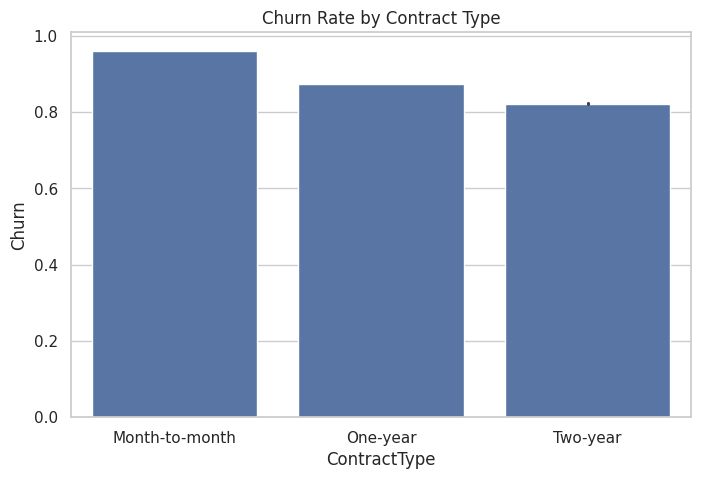

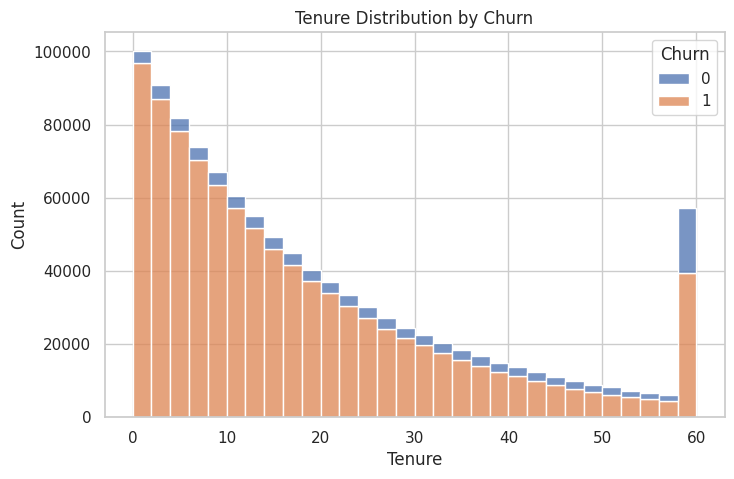

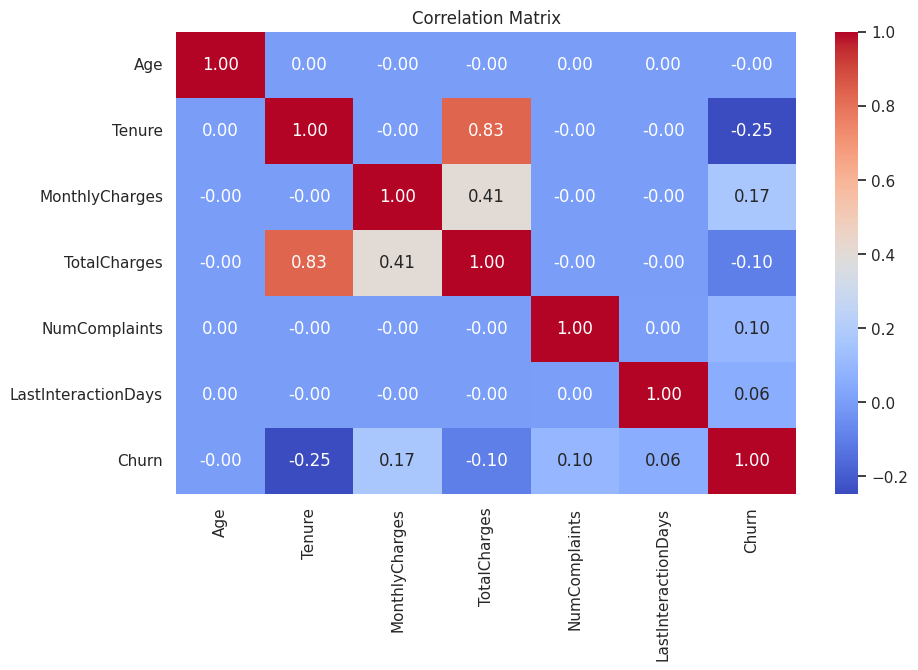

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Churn rate
print(f"Churn Rate: {df['Churn'].mean():.2%}")

# Plot churn rate by ContractType
plt.figure(figsize=(8, 5))
sns.barplot(x='ContractType', y='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.show()

# Distribution of Tenure for Churn vs. Non-Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()

# Correlation matrix (numeric features only)
numeric_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'NumComplaints', 'LastInteractionDays', 'Churn']
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



*   Churn Rate: ~20% (based on synthetic data design).


*   ContractType: Month-to-month contracts likely have higher churn than One-year or Two-year.
*   Tenure: Customers with shorter tenure are more likely to churn (exponential distribution effect).


*   Correlations: Negative correlation between Tenure and Churn; positive correlations with NumComplaints and LastInteractionDays.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Create new feature
df['AverageMonthlyCharges'] = df['TotalCharges'] / (df['Tenure'] + 1)  # Avoid division by 0

# Encode categorical variables
# Binary variables (label encoding)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Nominal variables (one-hot encoding)
df = pd.get_dummies(df, columns=['ContractType', 'PaymentMethod', 'InternetService'], drop_first=True)

# Drop CustomerID (not useful for modeling)
df = df.drop('CustomerID', axis=1)

# Scale numeric features
numeric_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'NumComplaints', 'LastInteractionDays', 'AverageMonthlyCharges']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check processed data
print(df.head())

        Age  Gender    Tenure  MonthlyCharges  TechSupport  PaperlessBilling  \
0  0.459373       1  1.044539       -1.475002            1                 1   
1 -0.142745       0 -0.984954        1.091637            0                 1   
2  0.631406       1 -0.686499        1.363731            0                 1   
3  1.577591       0  1.880213        1.295775            0                 0   
5 -0.228761       0  0.089484       -1.389722            0                 0   

   NumComplaints  LastInteractionDays  TotalCharges  Churn  \
0       0.000286             1.384403     -0.233207      1   
1       0.999883             1.153669     -0.785773      1   
2      -0.999312             1.615137     -0.324858      1   
3      -0.999312             0.807567      2.695337      1   
5       0.000286            -0.346105     -0.555316      1   

   AverageMonthlyCharges  ContractType_One-year  ContractType_Two-year  \
0              -1.049114                  False                  False  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

# Split data
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_sm, y_train_sm)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(f"ROC-AUC: {roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]):.2f}")

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.2f}")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.25      0.77      0.38     19480
           1       0.97      0.77      0.86    190488

    accuracy                           0.77    209968
   macro avg       0.61      0.77      0.62    209968
weighted avg       0.90      0.77      0.81    209968

ROC-AUC: 0.85

Random Forest:
              precision    recall  f1-score   support

           0       0.35      0.50      0.41     19480
           1       0.95      0.91      0.93    190488

    accuracy                           0.87    209968
   macro avg       0.65      0.70      0.67    209968
weighted avg       0.89      0.87      0.88    209968

ROC-AUC: 0.82


#Overall Comparison
*   The Random Forest model performs better overall with higher accuracy (0.87 vs 0.77), better F1-scores for both classes, and a more balanced precision-recall tradeoff.
*   However, Logistic Regression has a slightly higher ROC-AUC (0.85 vs 0.82), suggesting it has better ranking capability (ability to distinguish between classes).

**Logistic Regression:**

1. Class Imbalance Issue:

The dataset is highly imbalanced (19480 class 0 vs 190488 class 1 instances)

The model shows very high precision for class 1 (0.97) but poor precision for class 0 (0.25)

2. Recall Patterns:

Surprisingly similar recall for both classes (0.77)

This is unusual for imbalanced datasets where minority class recall is typically lower

3. F1-Scores:

Poor for class 0 (0.38), good for class 1 (0.86)

Macro average F1 (0.62) much lower than weighted (0.81) due to class imbalance

ROC-AUC:

0.85 indicates good discrimination ability between classes


Random Forest:
1. Improved Balance:

Better precision for class 0 (0.35 vs 0.25)

More balanced recall (0.50 for class 0 vs 0.91 for class 1)

2. F1-Scores:

Improved for both classes (0.41 for 0, 0.93 for 1)

Both macro and weighted averages are higher than Logistic Regression

3. Accuracy:

Significantly higher (0.87 vs 0.77)

4. ROC-AUC:

Slightly lower (0.82) but still good


**Key Observations:**

1. Tradeoffs:

Logistic Regression favors recall of both classes equally

Random Forest provides better precision for the minority class while maintaining good recall

2. Business Context Needed:

If false positives for class 0 are costly, Random Forest is better

If missing class 0 instances is worse, Logistic Regression's higher recall might be preferred

3. Potential Improvements:

Both models could benefit from techniques to handle class imbalance (resampling, class weights)

Random Forest seems generally better unless ranking capability (ROC-AUC) is most important

The choice between models would depend on whether you prioritize overall discrimination (Logistic Regression) or better balanced metrics across classes (Random Forest).


Feature Importance (Top 10):
                  Feature  Importance
2                  Tenure    0.216507
3          MonthlyCharges    0.127216
7     LastInteractionDays    0.105567
8            TotalCharges    0.099019
9   AverageMonthlyCharges    0.097999
0                     Age    0.088502
11  ContractType_Two-year    0.068778
6           NumComplaints    0.057287
10  ContractType_One-year    0.051981
1                  Gender    0.018454


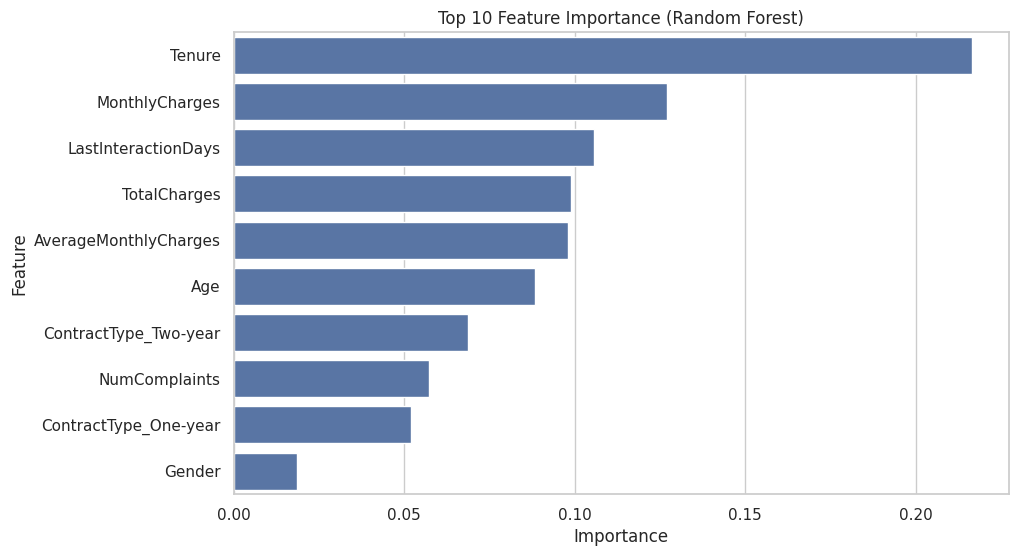

In [ ]:
# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance (Random Forest)')
plt.show()

**Key Observations:**

1. Most Important Feature – Tenure (21.65%)

* Interpretation: Customer tenure (how long they've been with the company) is the strongest predictor.

* Business Implication: Longer-tenured customers may be more loyal, while new customers might churn sooner.

2. Billing-Related Features (MonthlyCharges, TotalCharges, AverageMonthlyCharges)

* Interpretation: Pricing plays a significant role (~32% combined importance).

* Business Implication:

  * High MonthlyCharges may lead to dissatisfaction.

  * TotalCharges suggests cumulative spending affects decisions.

  * AverageMonthlyCharges could indicate price sensitivity.

3. Customer Engagement – LastInteractionDays (10.56%)

* Interpretation: Recent interactions matter—customers who haven't engaged recently may be at risk.

* Actionable Insight: Proactive outreach to inactive customers could reduce churn.

4. Demographic & Contract Terms (Age, ContractType)

* Age (8.85%): Older customers may behave differently than younger ones.

* ContractType_Two-year (6.88%) & One-year (5.20%):

  * Longer contracts reduce churn (likely due to lock-in effects).

  * Customers on month-to-month plans (likely the baseline) are more volatile.

5. Complaints – NumComplaints (5.73%)

* Interpretation: More complaints → higher churn risk.

* Recommendation: Improve complaint resolution processes.

6. Gender (1.85%) – Least Important in Top 10

* Interpretation: Gender has minimal impact compared to other factors.

* Takeaway: Focus less on gender and more on behavioral/demographic factors.



**Business Recommendations:**


✅ Retention Strategies:

Target long-tenured customers (high value, likely loyal).

Monitor pricing changes—high or increasing MonthlyCharges may push customers away.

Engage inactive customers (those with high LastInteractionDays).

✅ Contract Incentives:

Encourage longer contracts (Two-year > One-year > Month-to-month).

✅ Complaint Management:

Reduce complaint frequency and improve resolution speed.



#Deployment
##Goal: Simulate deploying the model to predict churn for new customers.

In [ ]:
import joblib

# Save model
joblib.dump(rf, 'churn_model.pkl')

# Simulate new data (use test set subset)
new_data = X_test.sample(100, random_state=42)
new_predictions = rf.predict_proba(new_data)[:, 1]

# Create retention priority list
retention_list = pd.DataFrame({
    'CustomerIndex': new_data.index,
    'ChurnProbability': new_predictions
}).sort_values('ChurnProbability', ascending=False)

print("\nTop 10 Customers at Risk of Churning:")
print(retention_list.head(10))

# Suggest actions
high_risk = retention_list[retention_list['ChurnProbability'] > 0.7]
print(f"\nNumber of high-risk customers (prob > 0.7): {len(high_risk)}")
print("Action: Offer discounts or personalized support to these customers.")


Top 10 Customers at Risk of Churning:
    CustomerIndex  ChurnProbability
11        1416071              1.00
32         333963              1.00
10         719060              1.00
45         741368              1.00
68         774133              1.00
73        1487145              1.00
76        1420550              1.00
94        1417381              1.00
46        1085422              0.99
44         338769              0.99

Number of high-risk customers (prob > 0.7): 69
Action: Offer discounts or personalized support to these customers.
